In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
# reading the dataset
df = pd.read_csv("train.csv")
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [16]:
df.shape

(1460, 81)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [19]:
df.isnull().sum()[df.isnull().sum()> 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [21]:
round(100*df.isnull().sum()[(df.isnull().sum()>0)]/len(df), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [22]:
print(df.duplicated(subset=None, keep='first').count())

1460


In [23]:
# Calculate total missing values and their percentage
total_missing = df.isnull().sum()
percentage_missing = (total_missing / len(df)) * 100

# Combine the total and percentage missing values into a DataFrame
missdata = pd.DataFrame({'Total Missing': total_missing, 'Percentage Missing': percentage_missing})
missdata = missdata.sort_values(by='Percentage Missing', ascending=False)

# Display the top 20 columns with the highest percentage of missing values
print(missdata.head(20))

              Total Missing  Percentage Missing
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageYrBlt              81            5.547945
GarageCond               81            5.547945
GarageType               81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
BsmtFinType2             38            2.602740
BsmtExposure             38            2.602740
BsmtQual                 37            2.534247
BsmtCond                 37            2.534247
BsmtFinType1             37            2.534247
MasVnrArea                8            0.547945
MasVnrType                8            0.547945
Electrical                1            0.068493
Id                        0            0

In [24]:
#you can find these features on the description data file provided

null_withmeaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [25]:
for i in null_withmeaning:
    df[i].fillna("None", inplace=True)

In [26]:
# basement columns:
Basement = df[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

<Figure size 2000x1200 with 0 Axes>

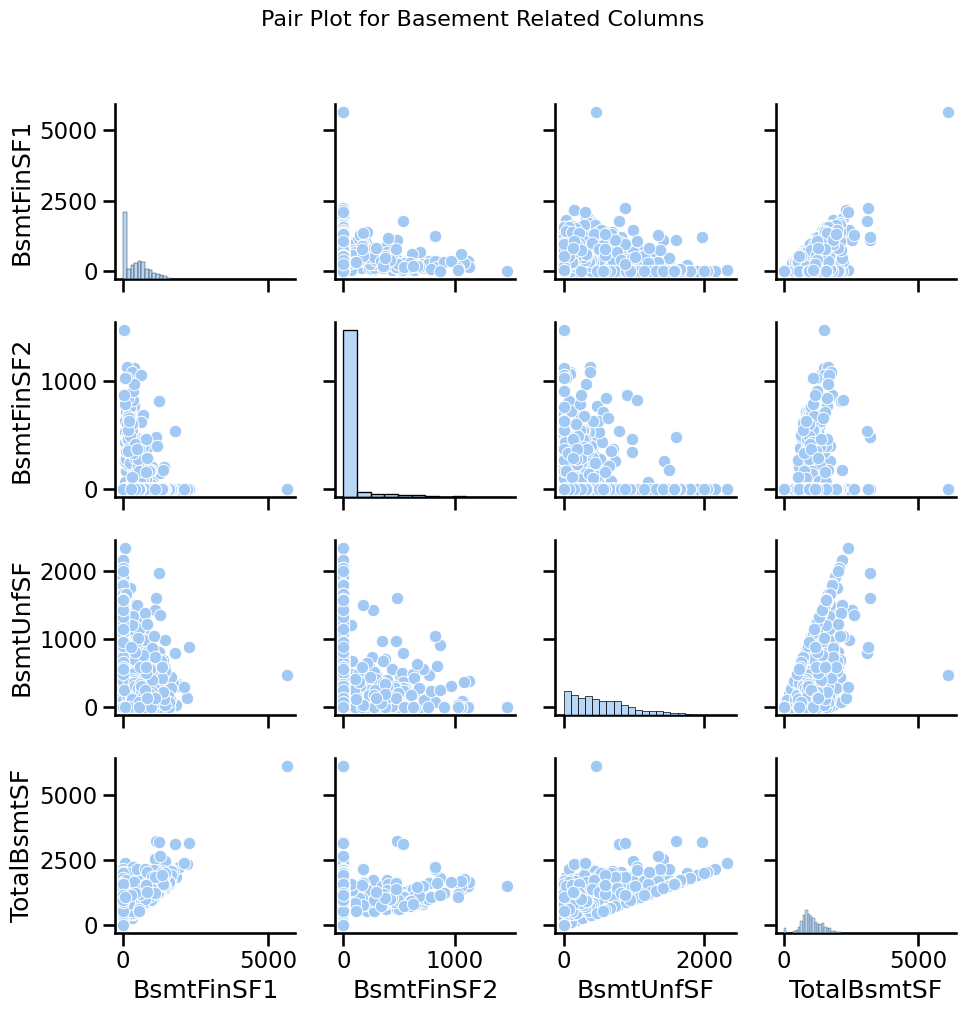

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a beautiful color palette
sns.set_palette("pastel")

# Set context for better readability
sns.set_context("talk")

# Plot a pair plot for basement-related columns
plt.figure(figsize=(20, 12))
sns.pairplot(Basement)

# Add a meaningful title
plt.suptitle("Pair Plot for Basement Related Columns", y=1.02, fontsize=16)

# Adjust labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='BsmtFinType2', ylabel='SalePrice'>

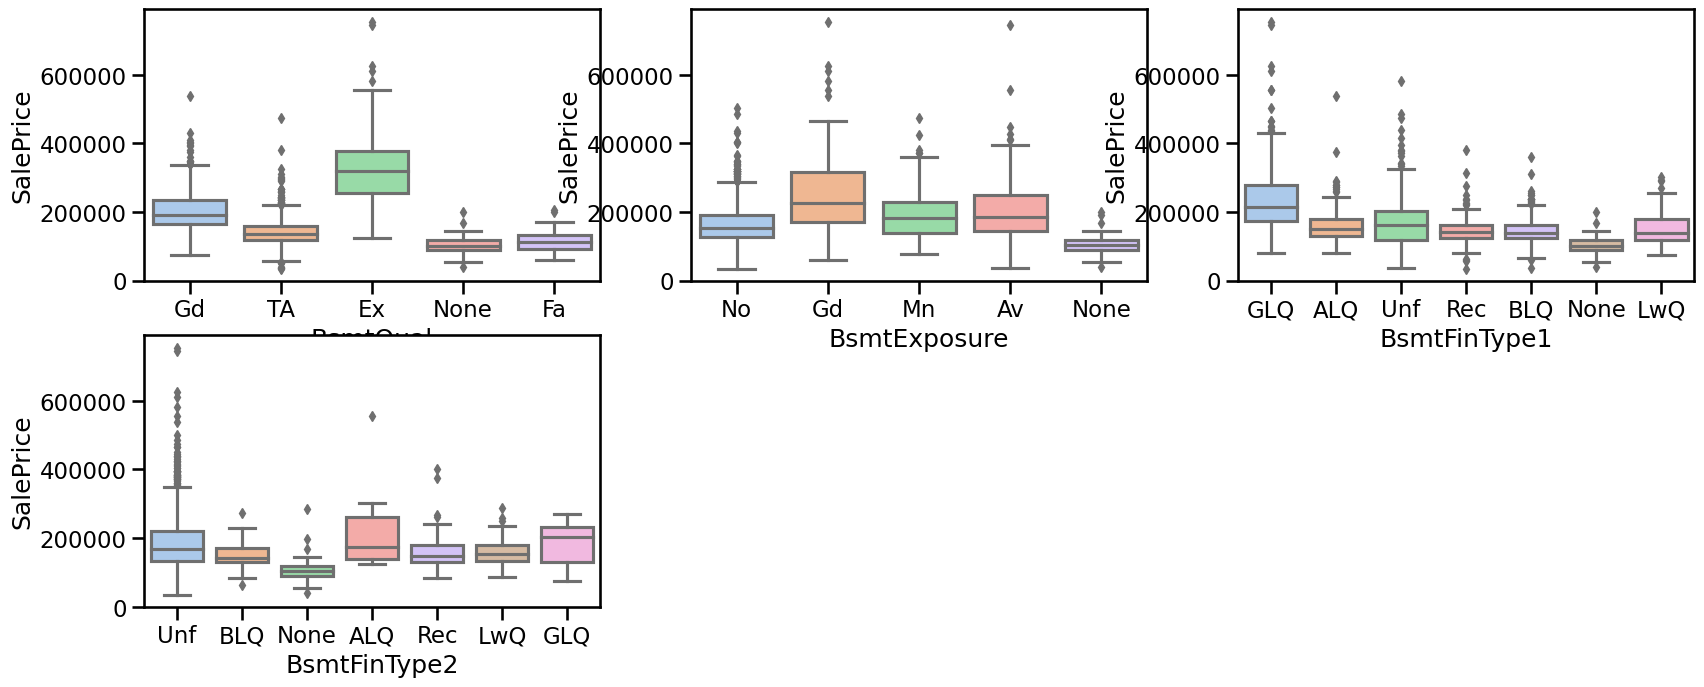

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = df)

In [29]:
round(100*df.isnull().sum()[(df.isnull().sum()>0)]/len(df), 2)

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64

In [30]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with a strategy to fill missing values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [31]:
# Calculate total missing values and their percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percentage_missing = (total_missing / len(df)) * 100

# Combine the total and percentage missing values into a DataFrame
missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percentage Missing': percentage_missing})

# Display the columns with missing values
print("Columns with Missing Values:")
print(missing_data.head())


missing_data[missing_data['Total Missing'] > 0]

Columns with Missing Values:
             Total Missing  Percentage Missing
LotFrontage            259           17.739726
GarageYrBlt             81            5.547945
MasVnrType               8            0.547945
MasVnrArea               8            0.547945
Electrical               1            0.068493


Total Missing  Percentage Missing
LotFrontage            259           17.739726
GarageYrBlt             81            5.547945
MasVnrType               8            0.547945
MasVnrArea               8            0.547945
Electrical               1            0.068493

In [32]:
df.drop("LotFrontage", axis=1, inplace=True)

In [33]:
# Fill missing values in 'GarageYrBlt' with the median value
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

# Fill missing values in 'MasVnrArea' with the median value
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

# Fill missing values in 'MasVnrType' with "None"
df['MasVnrType'].fillna('None', inplace=True)

In [34]:
# Calculate total missing values and their percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percentage_missing = (total_missing / len(df)) * 100

# Combine the total and percentage missing values into a DataFrame
missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percentage Missing': percentage_missing})

# Display the columns with missing values
print("Columns with Missing Values:")
print(missing_data.head())


missing_data[missing_data['Total Missing'] > 0]


Columns with Missing Values:
             Total Missing  Percentage Missing
Electrical               1            0.068493
MSSubClass               0            0.000000
GarageYrBlt              0            0.000000
GarageType               0            0.000000
FireplaceQu              0            0.000000


Total Missing  Percentage Missing
Electrical              1            0.068493

In [35]:
df.dropna(inplace=True)

In [36]:
# Calculate total missing values and their percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percentage_missing = (total_missing / len(df)) * 100

# Combine the total and percentage missing values into a DataFrame
missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percentage Missing': percentage_missing})

# Display the columns with missing values
print("Columns with Missing Values:")
print(missing_data.head())


missing_data[missing_data['Total Missing'] > 0]

Columns with Missing Values:
             Total Missing  Percentage Missing
Id                       0                 0.0
MSSubClass               0                 0.0
GarageYrBlt              0                 0.0
GarageType               0                 0.0
FireplaceQu              0                 0.0


Empty DataFrame
Columns: [Total Missing, Percentage Missing]
Index: []

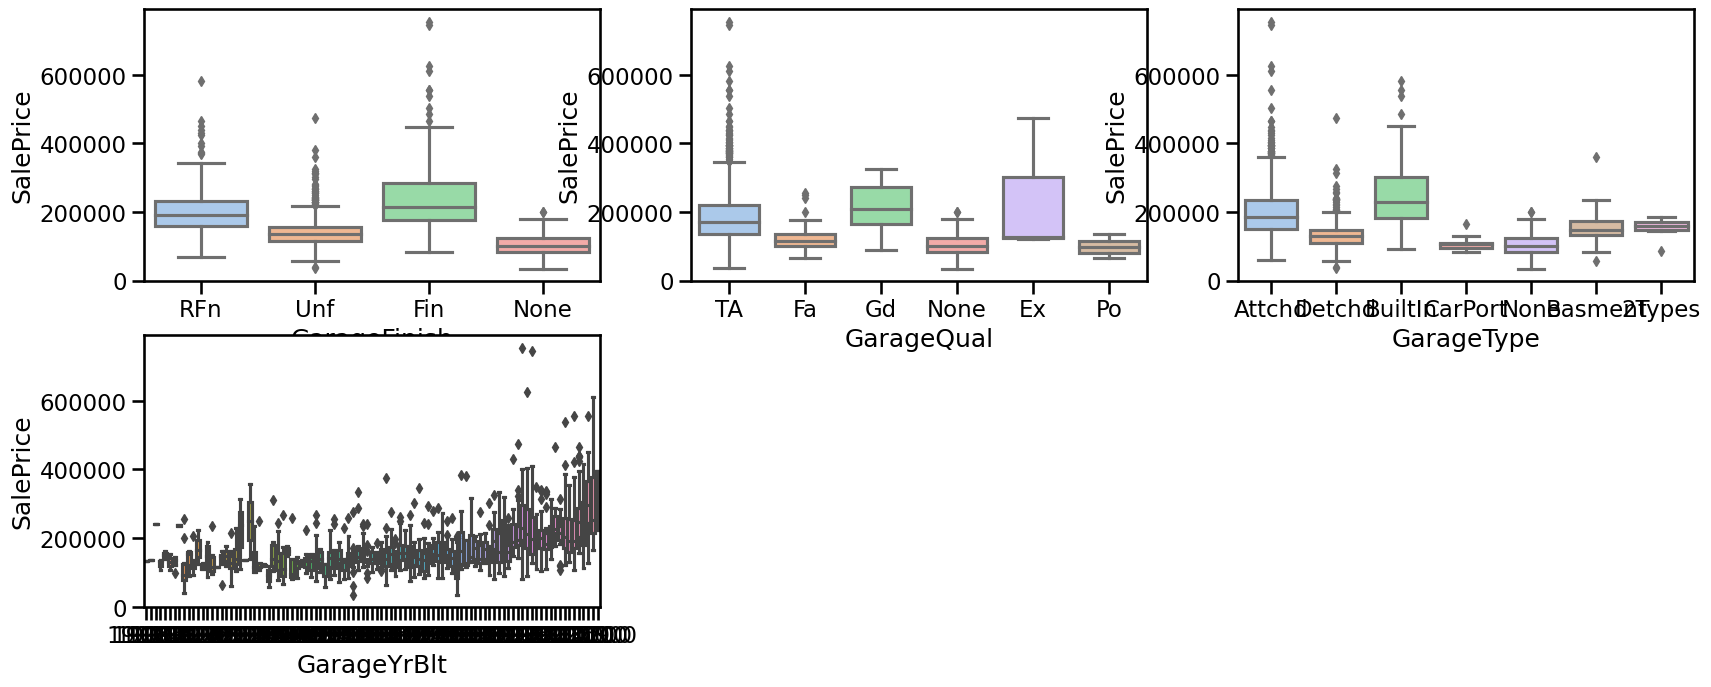

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = df)
plt.show()

In [38]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
print(corrmat)

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.010589 -0.033170    -0.027553     0.013167   
MSSubClass     0.010589    1.000000 -0.139766     0.032936    -0.059134   
LotArea       -0.033170   -0.139766  1.000000     0.105786    -0.005665   
OverallQual   -0.027553    0.032936  0.105786     1.000000    -0.092243   
OverallCond    0.013167   -0.059134 -0.005665    -0.092243     1.000000   
YearBuilt     -0.013945    0.027435  0.014296     0.573334    -0.375780   
YearRemodAdd  -0.023158    0.040199  0.013852     0.551605     0.074158   
MasVnrArea    -0.050515    0.023792  0.103302     0.407075    -0.125922   
BsmtFinSF1    -0.004001   -0.069501  0.214121     0.239265    -0.046595   
BsmtFinSF2    -0.005668   -0.065549  0.111158    -0.059291     0.040132   
BsmtUnfSF     -0.007508   -0.140627 -0.002641     0.308018    -0.137008   
TotalBsmtSF   -0.013815   -0.238160  0.260962     0.537523    -0.171796   
1stFlrSF       0.011627  

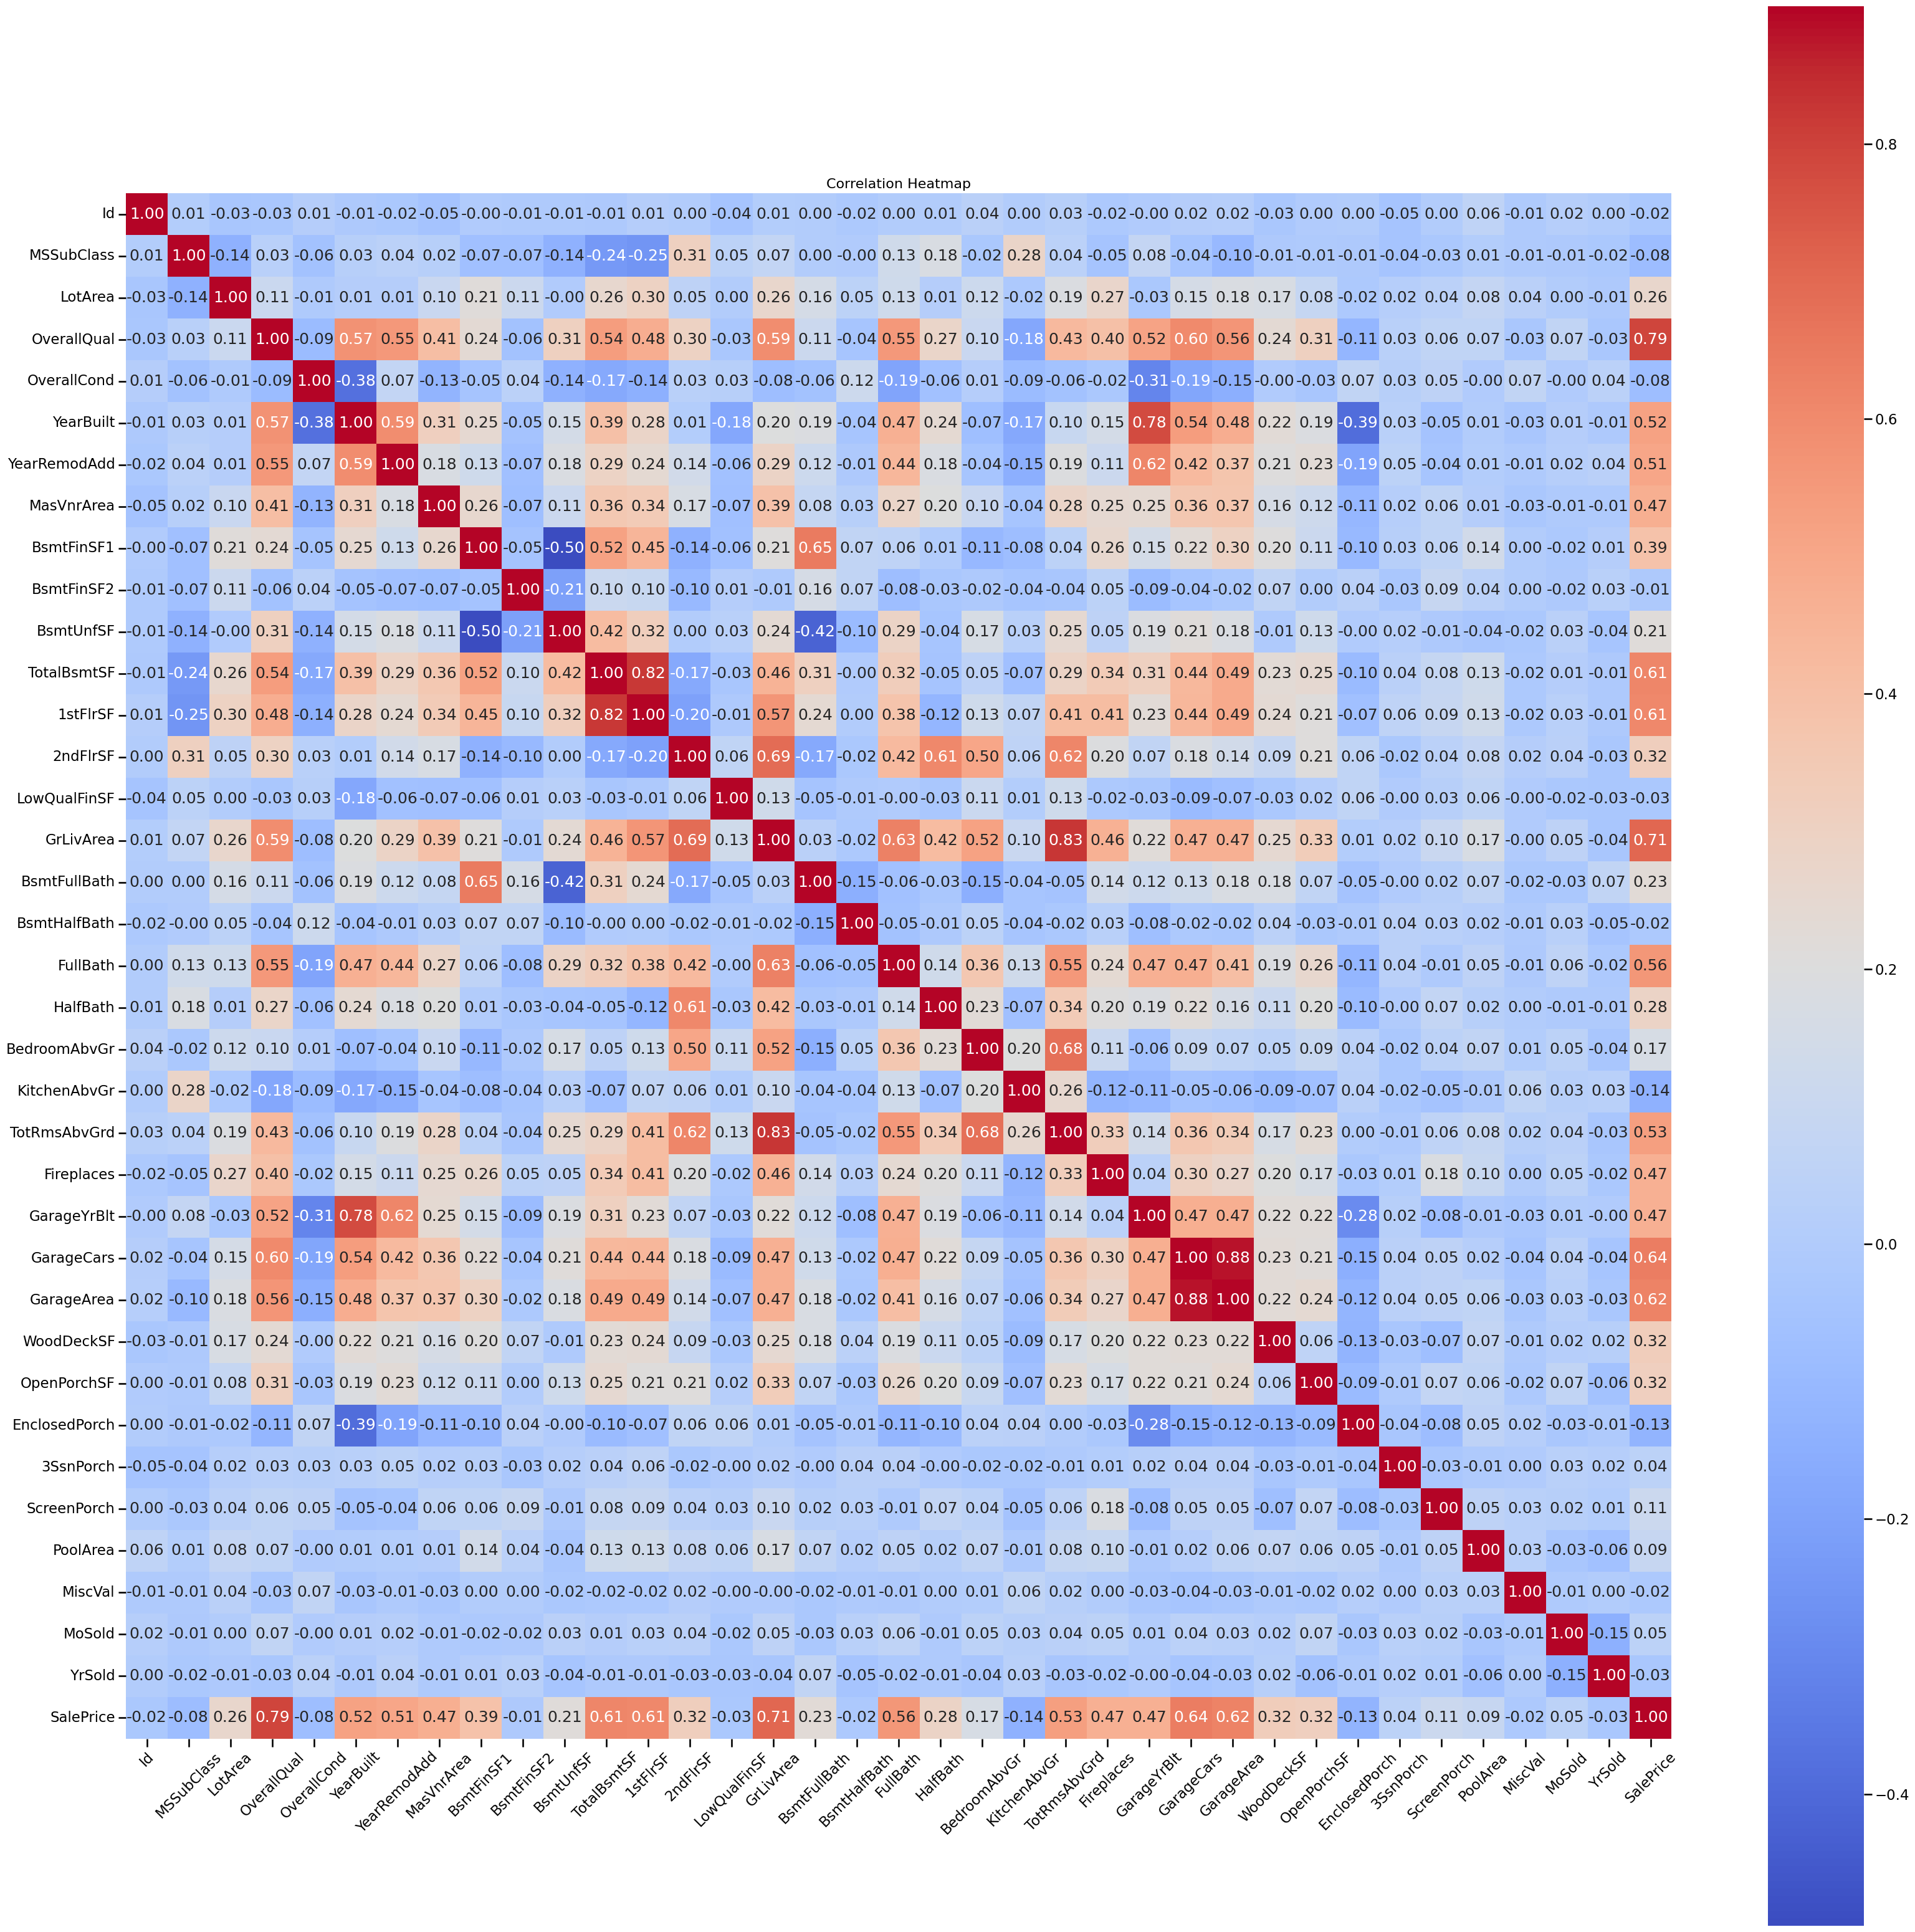

In [39]:
# Create a figure with a larger size
plt.figure(figsize=(40 ,40))

# Generate the heatmap with adjusted annotations
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt='.2f', cmap='coolwarm')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title (if desired)
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()


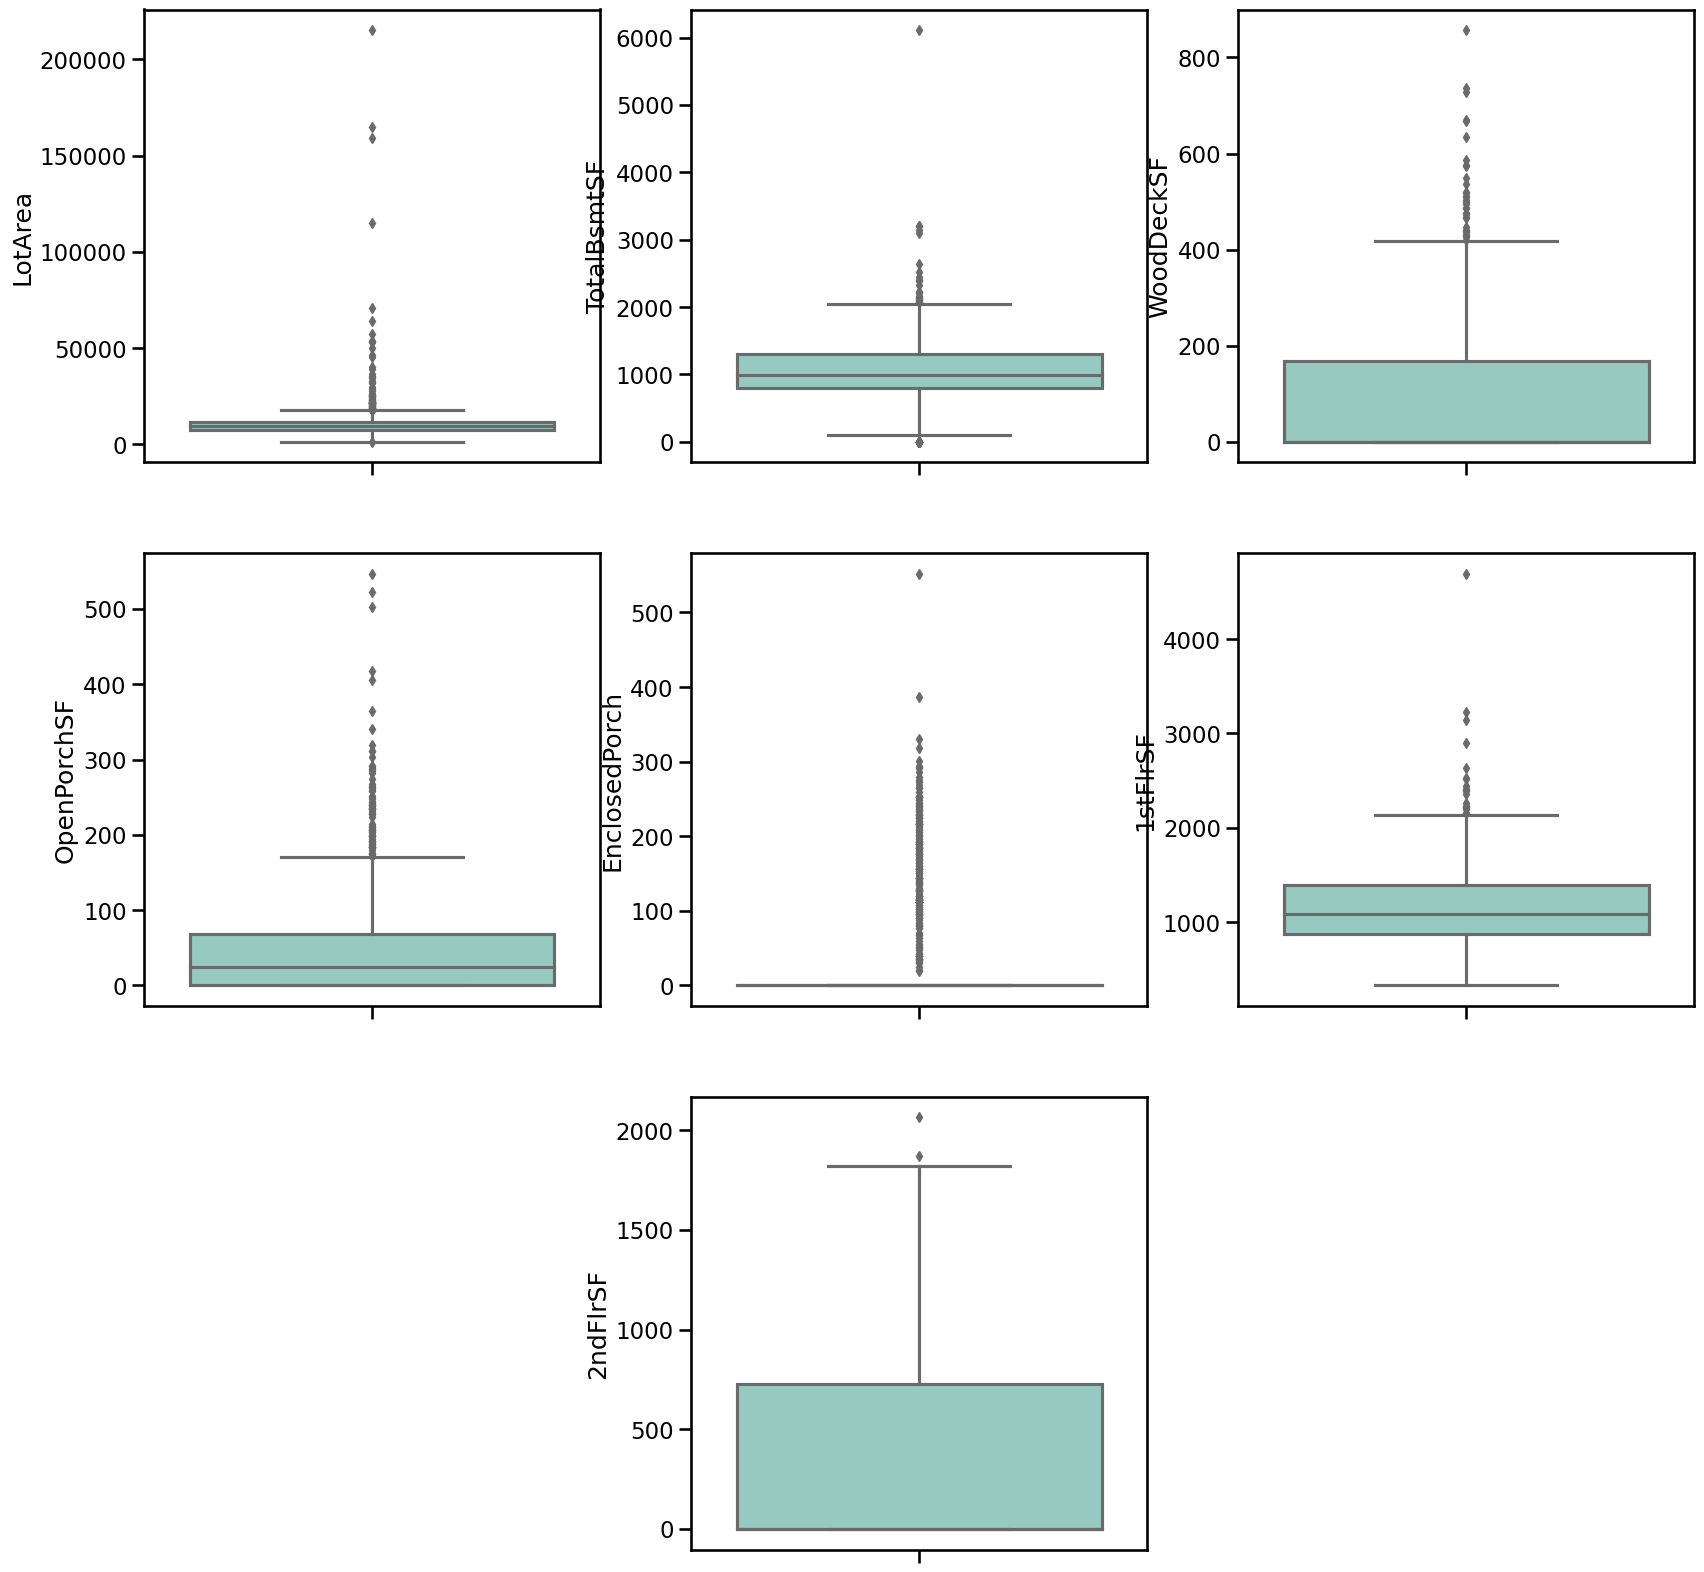

In [40]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = df)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = df)

plt.show()

In [41]:
# Define the list of columns to remove outliers
columns_to_remove_outliers = ["LotArea", "TotalBsmtSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"]

# Remove outliers for each column
for column in columns_to_remove_outliers:
    df = df[df[column] < df[column].quantile(0.99)]


In [42]:
df.shape

(1385, 80)

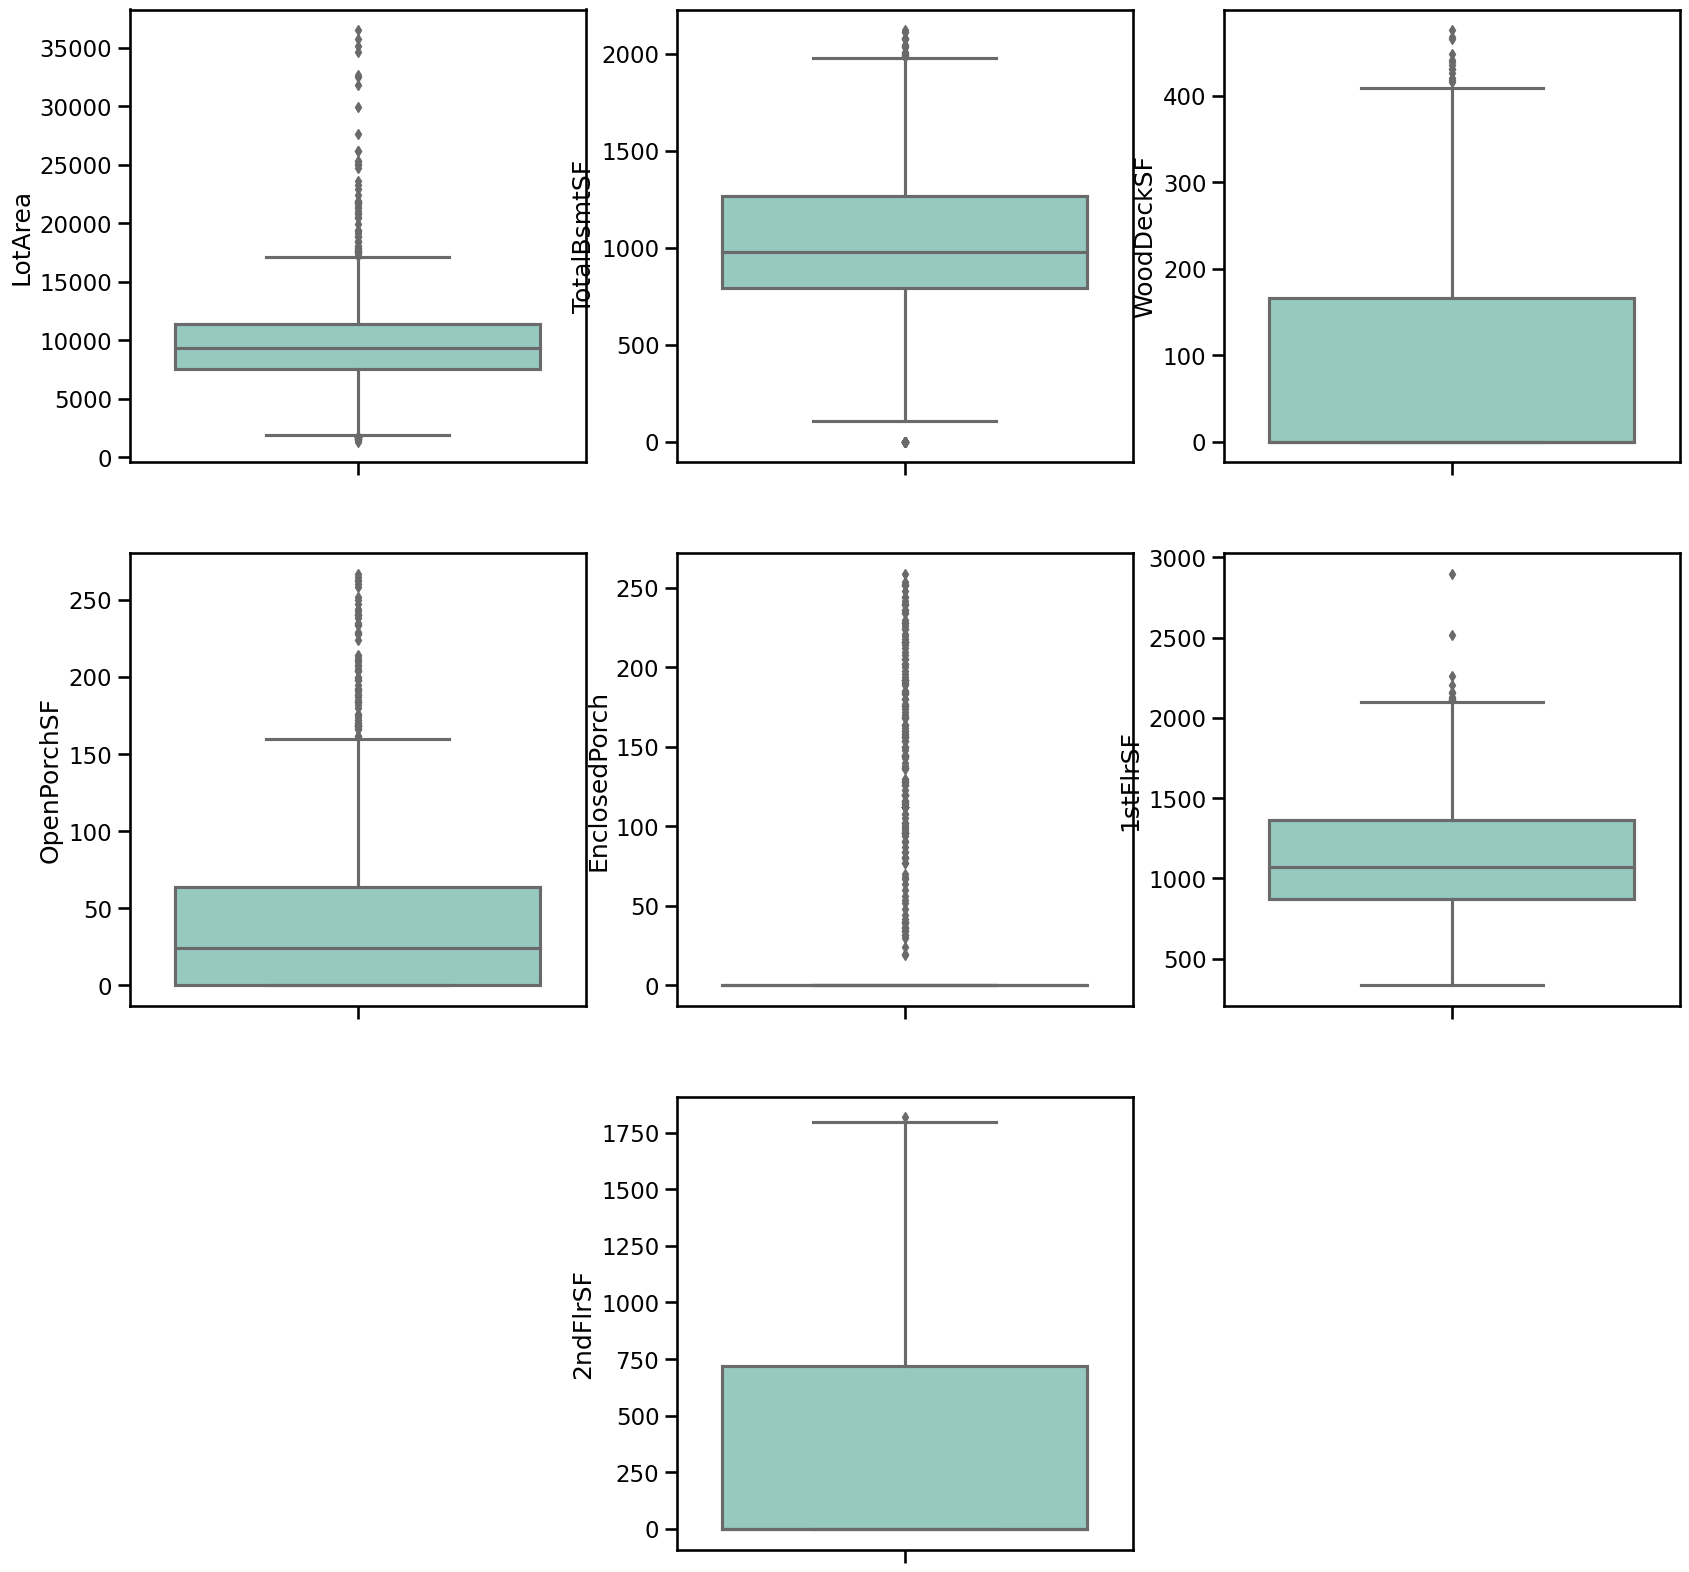

In [43]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = df)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = df)

plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

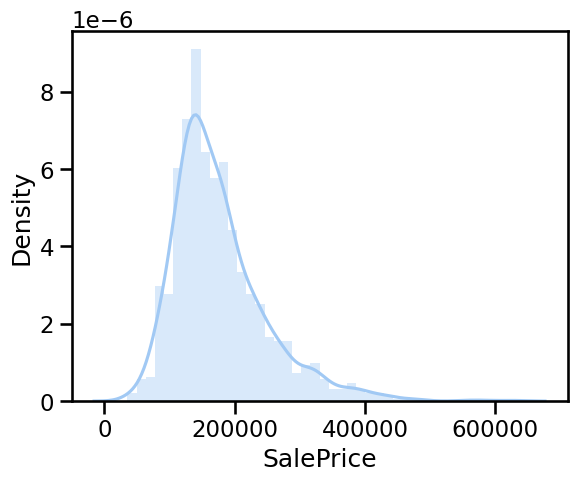

In [44]:
import seaborn as sns

# Plot the distribution of 'SalePrice'
sns.distplot(df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

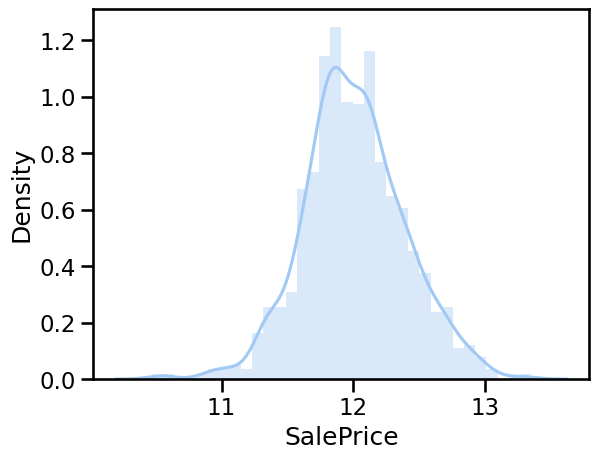

In [45]:
sns.distplot(np.log(df["SalePrice"]))

In [46]:
# Check the numerical values using pairplots

Num1=df[['LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

Num2=df[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',
'OpenPorchSF','SalePrice']]

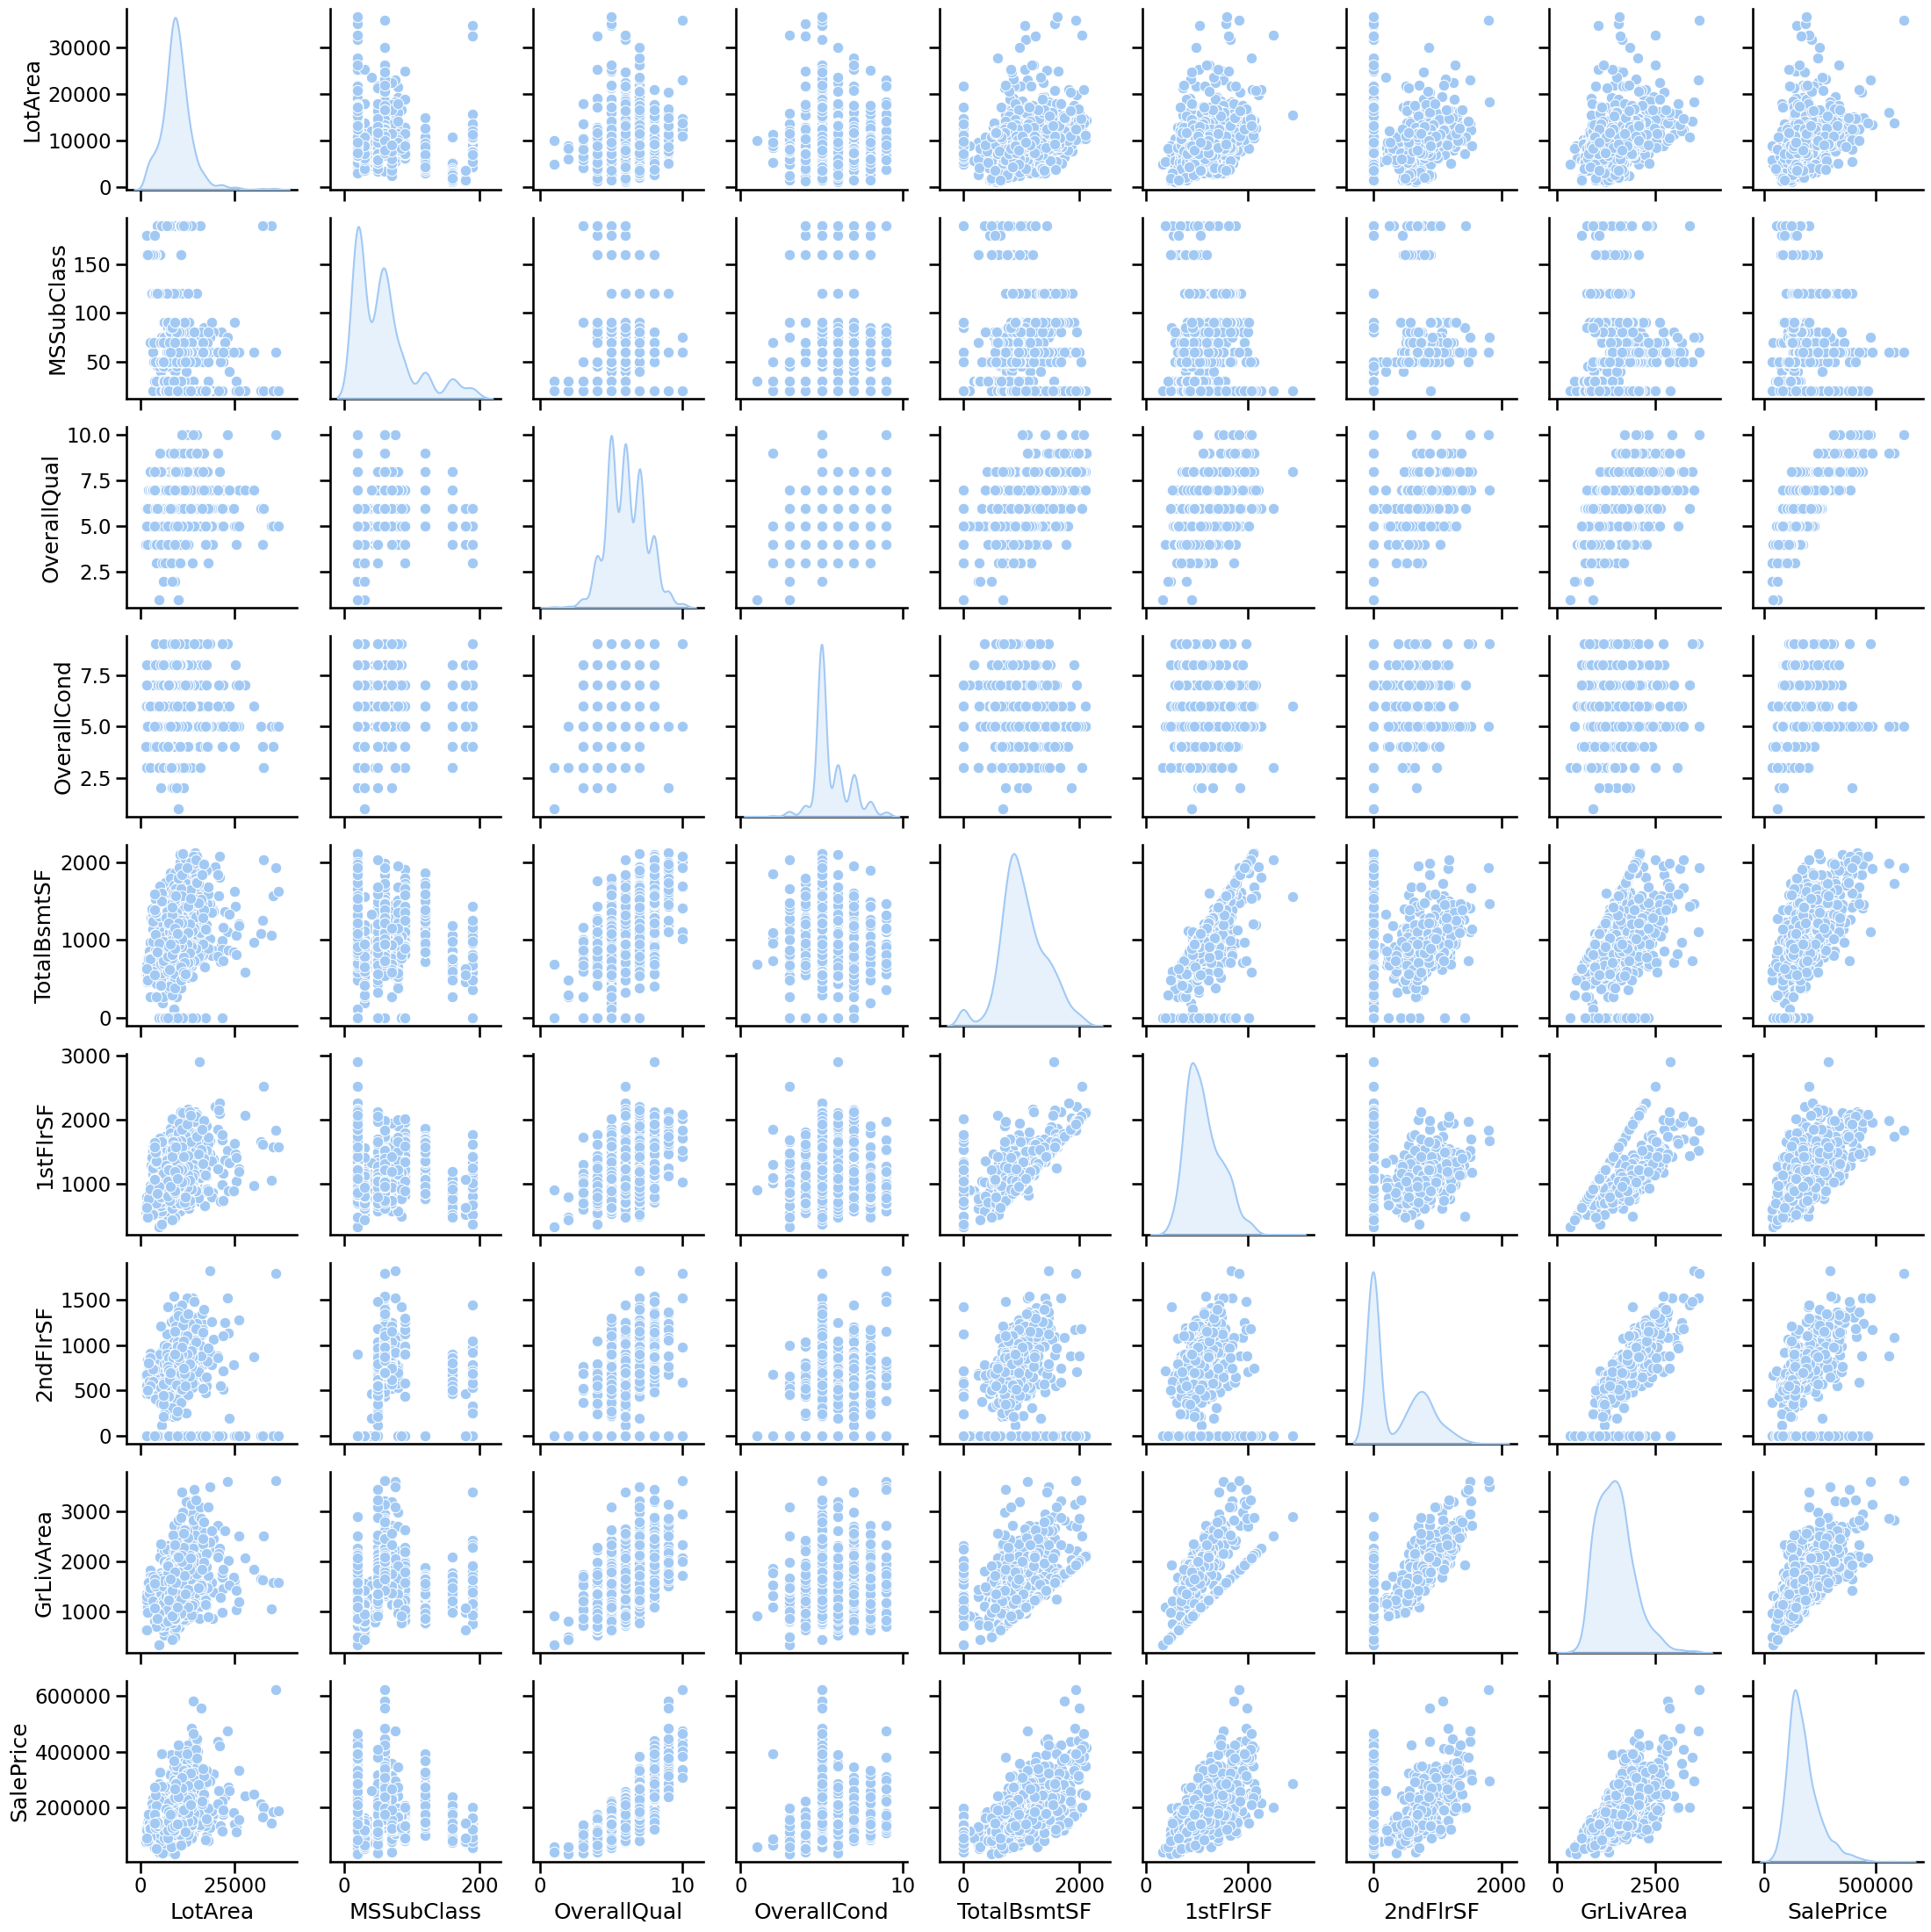

In [47]:
sns.pairplot(Num1, diag_kind='kde')
plt.show()

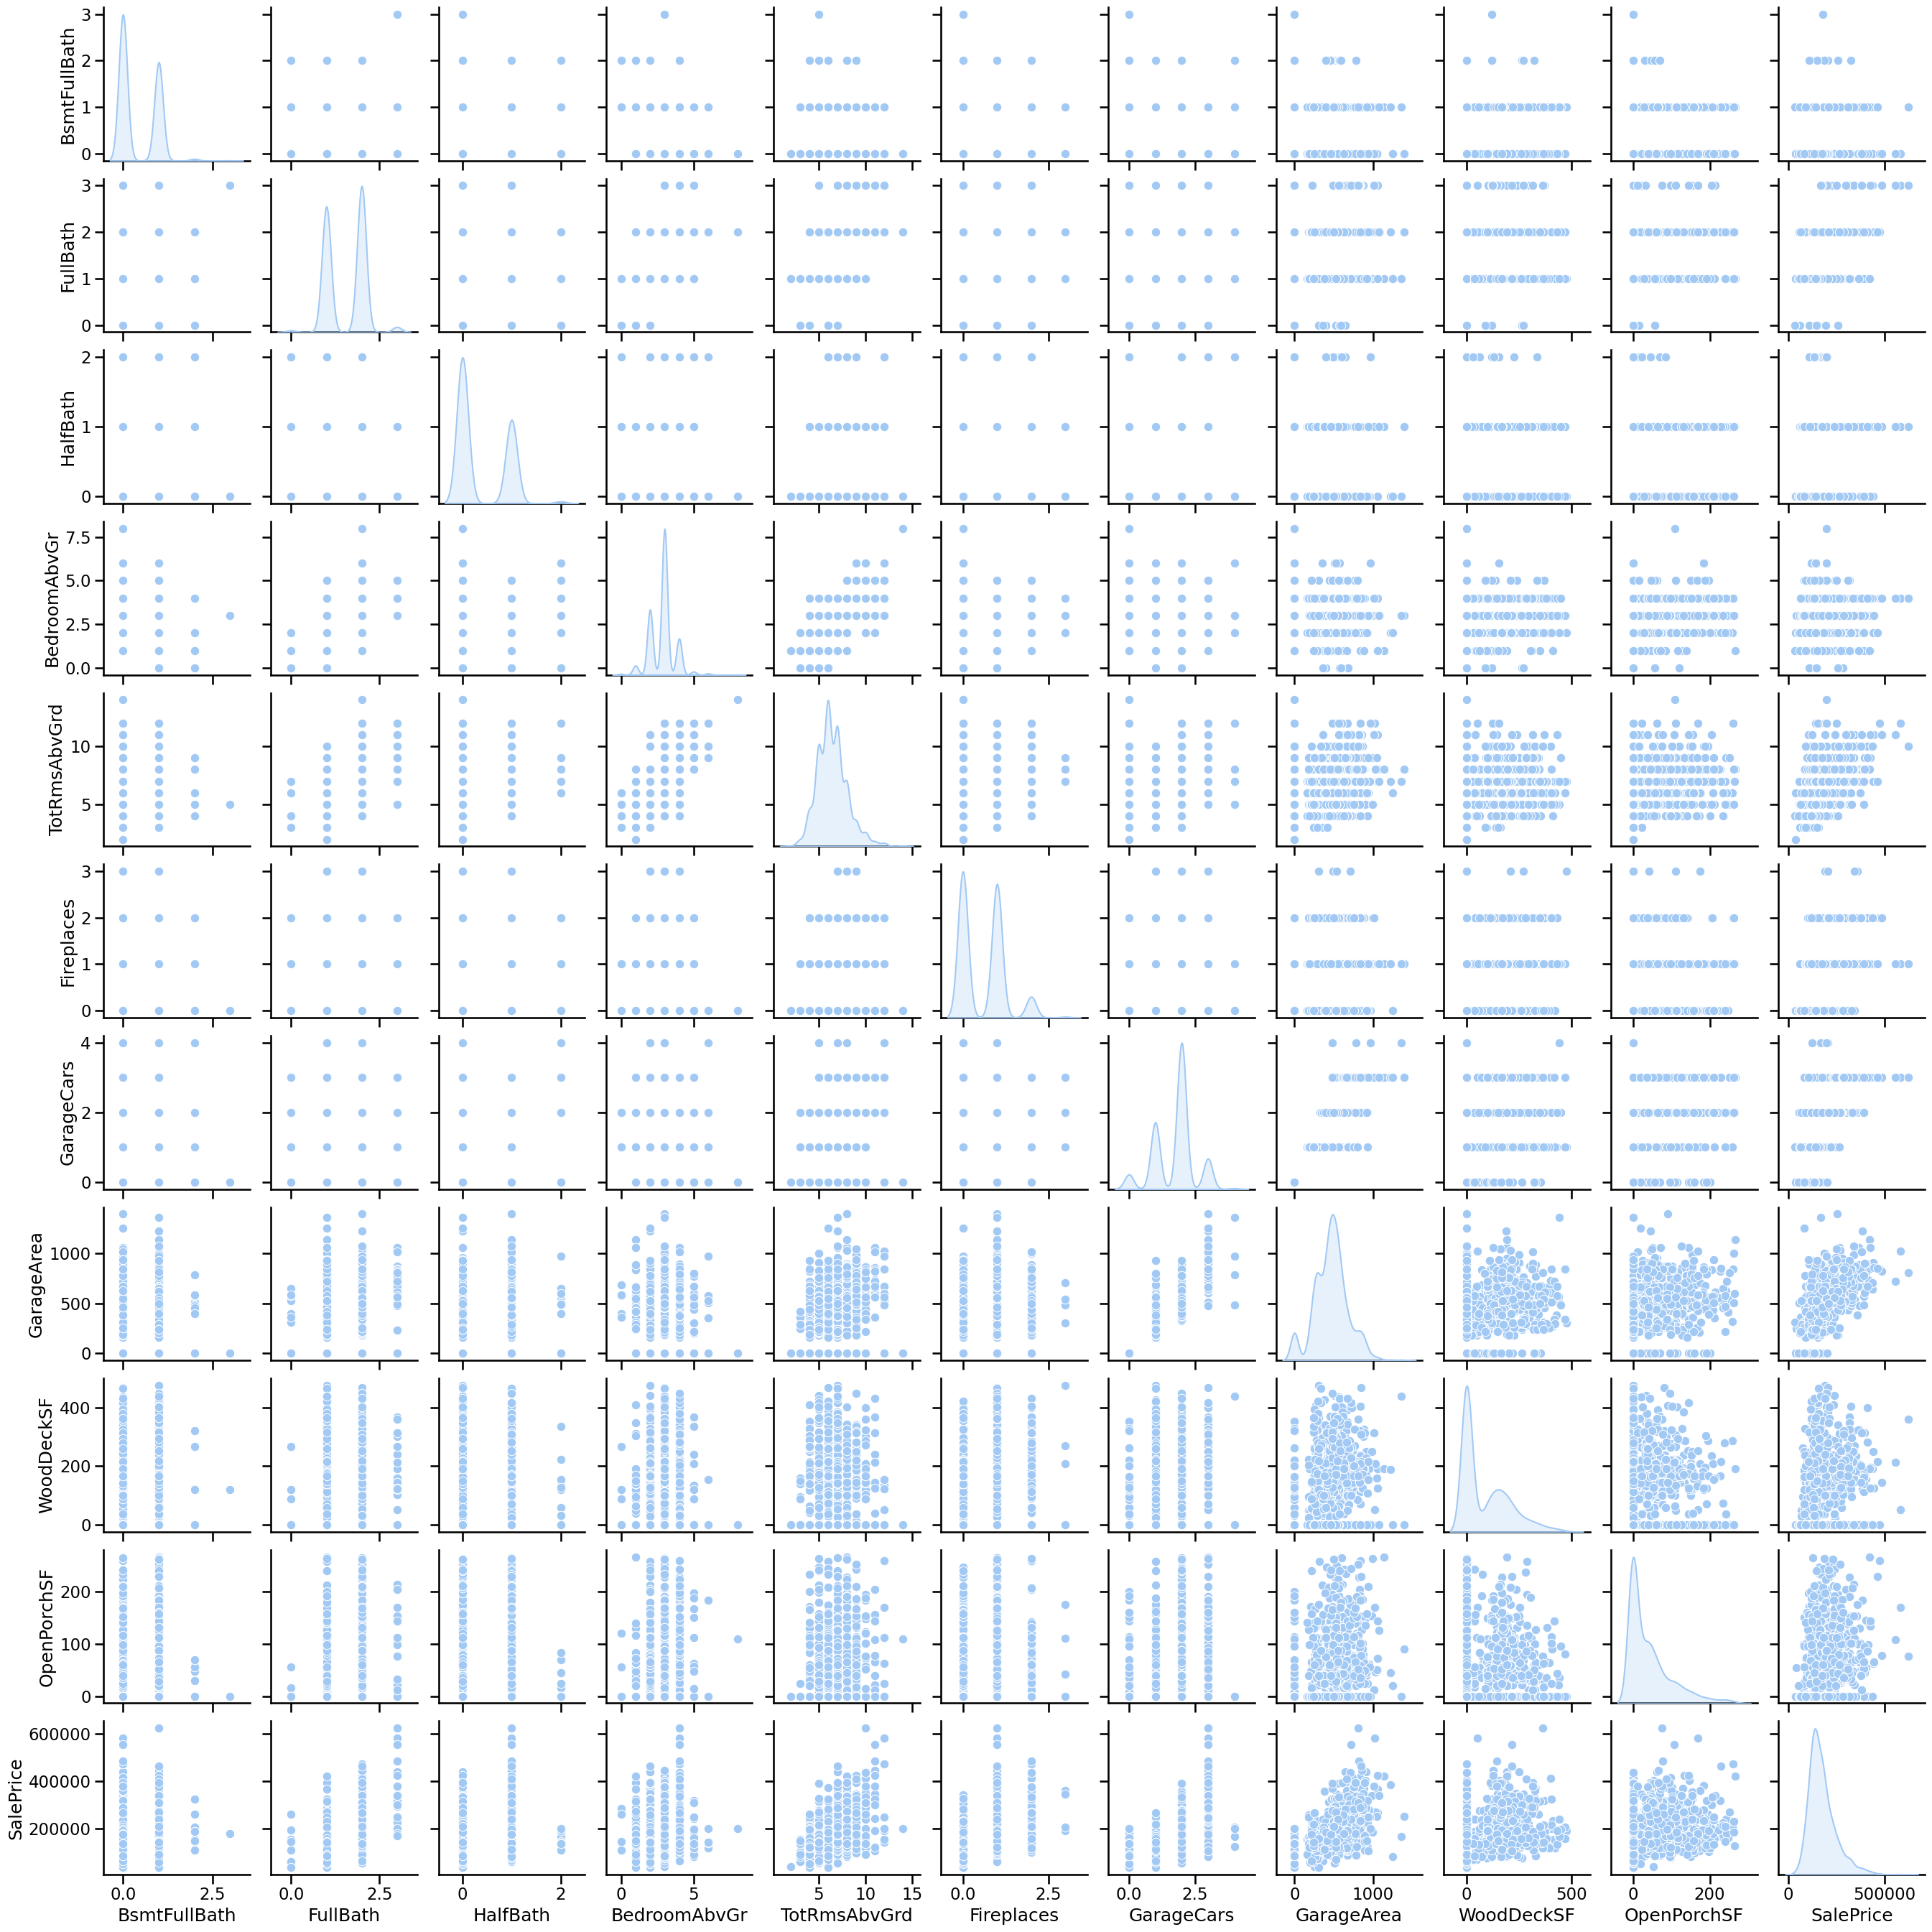

In [48]:
sns.pairplot(Num2, diag_kind='kde')
plt.show()

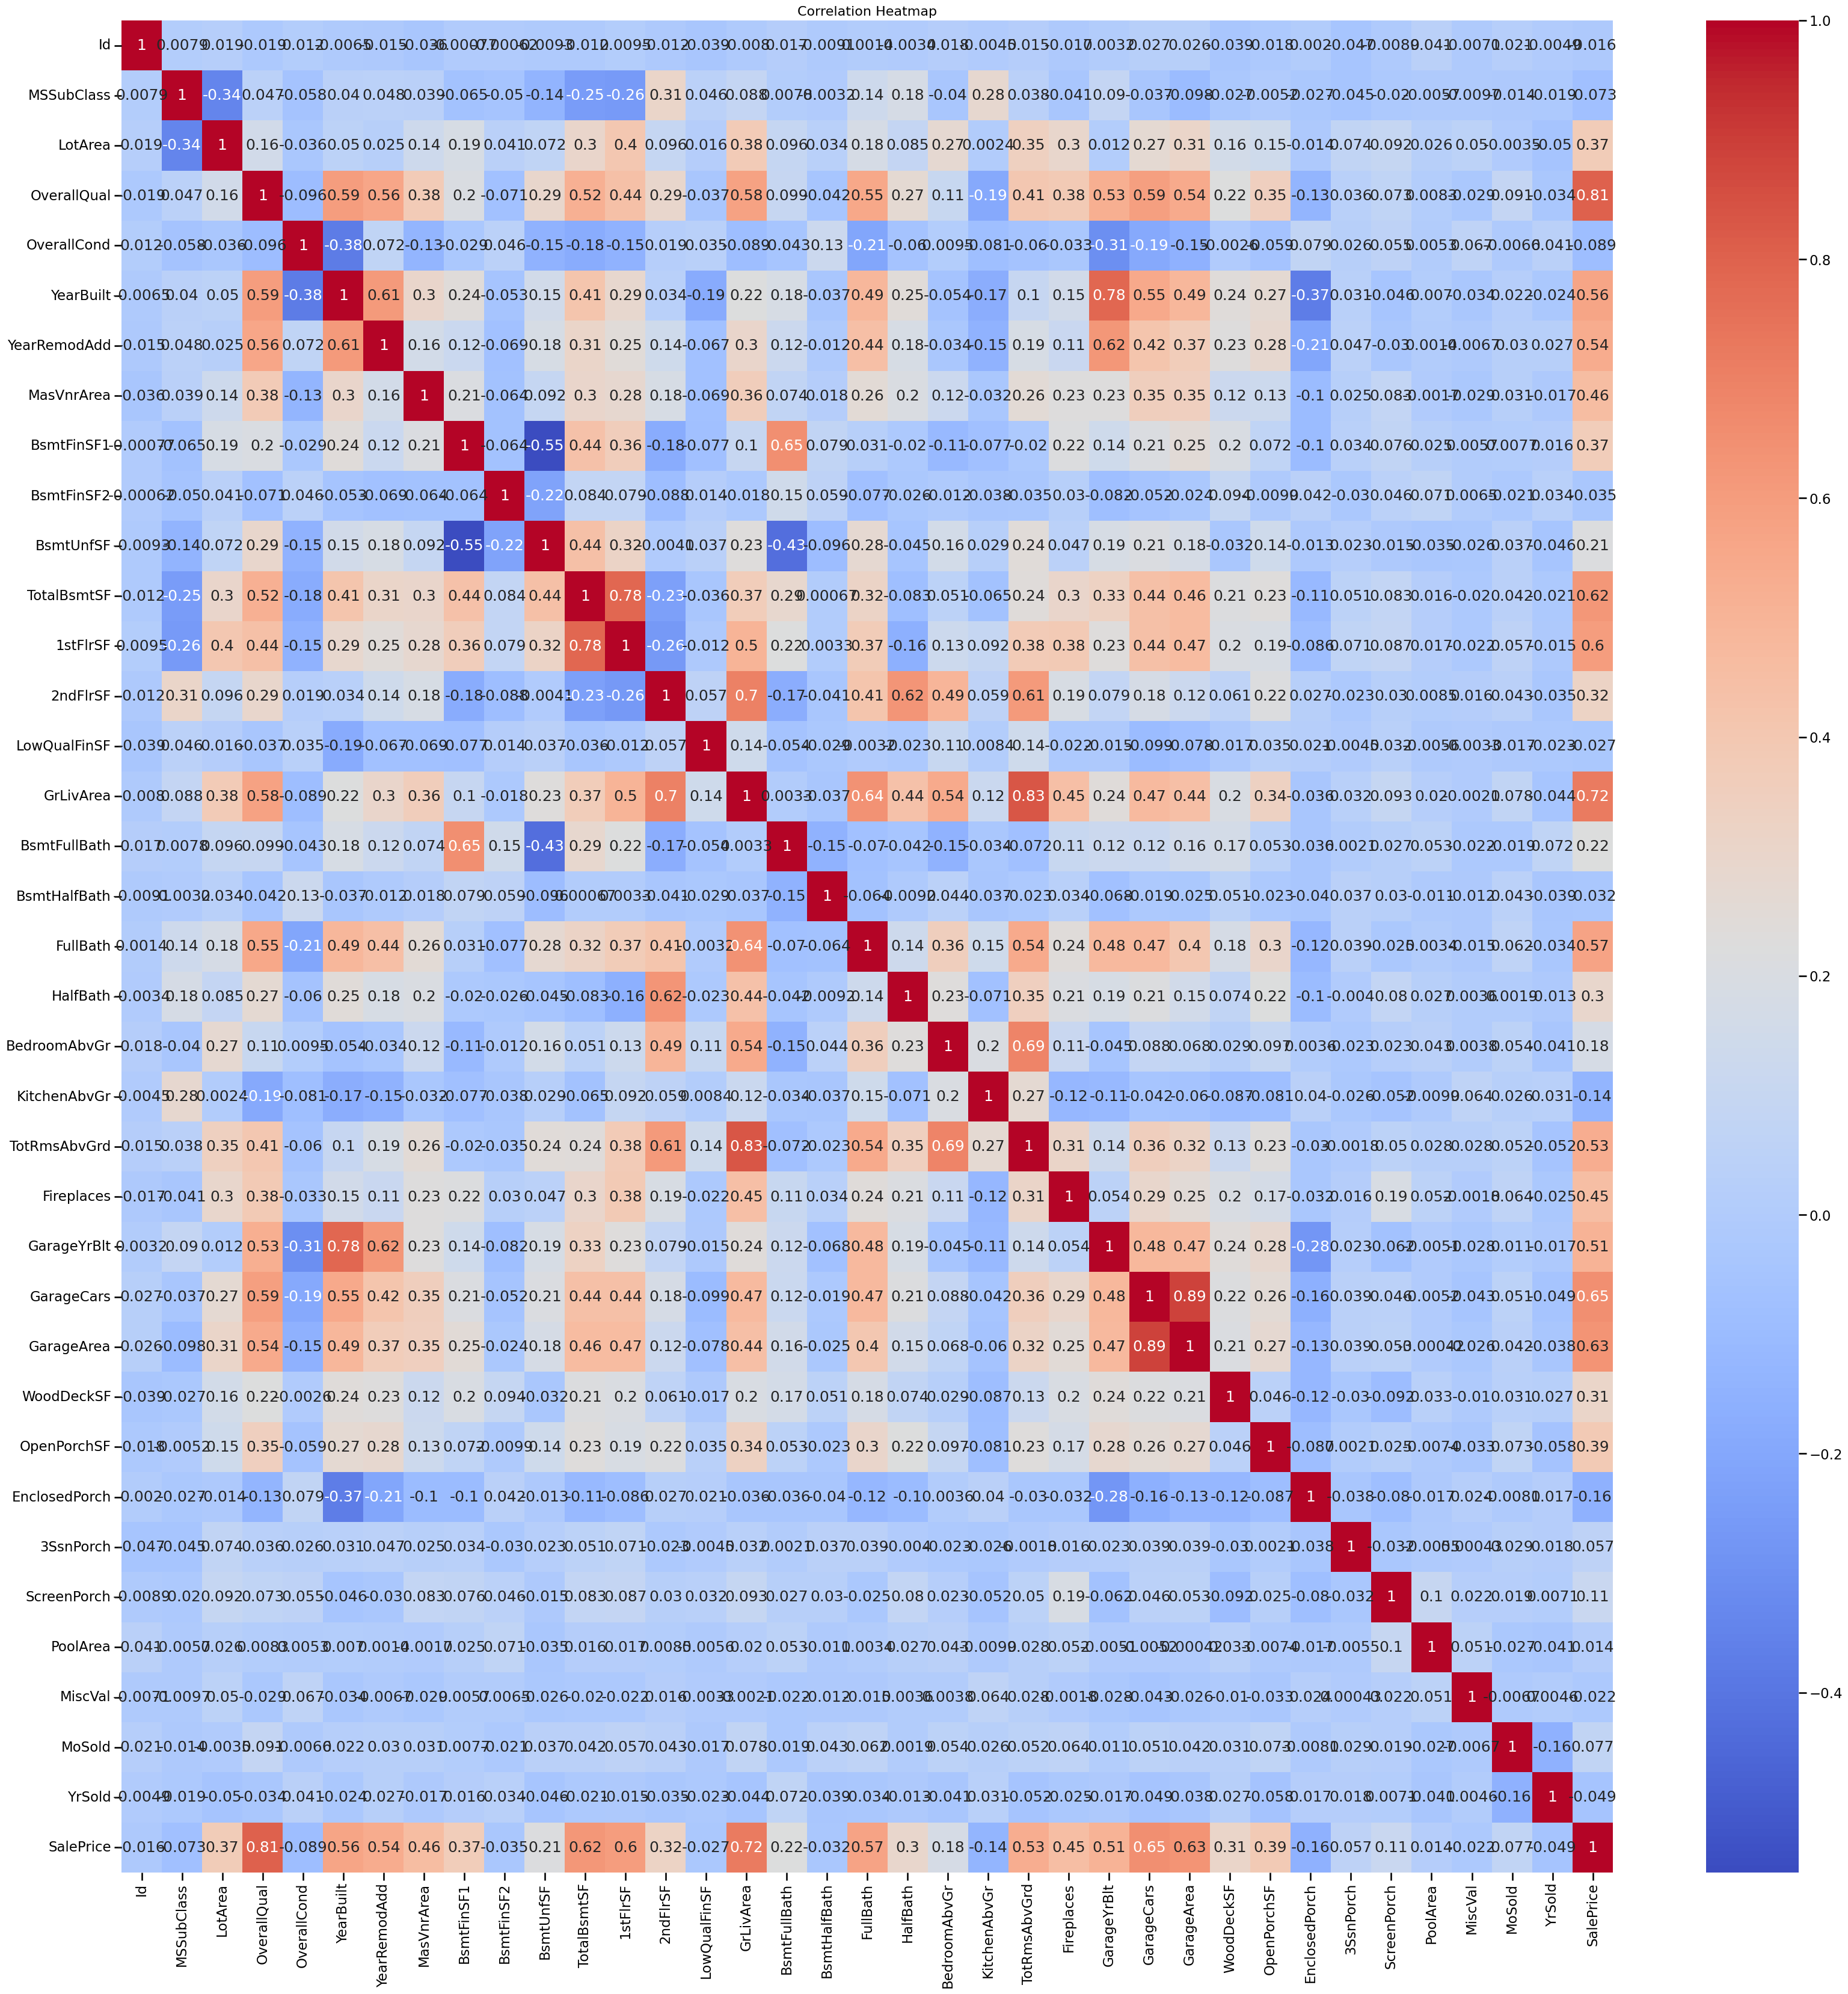

In [49]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Removing following columns which shows high correlation

TotRmsAbvGrd and GrLivArea show 83%
Garage Area and Garage Cars show 89%

In [50]:
df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [51]:
df.shape

(1385, 78)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1385 non-null   int64  
 1   MSSubClass     1385 non-null   int64  
 2   MSZoning       1385 non-null   object 
 3   LotArea        1385 non-null   int64  
 4   Street         1385 non-null   object 
 5   Alley          1385 non-null   object 
 6   LotShape       1385 non-null   object 
 7   LandContour    1385 non-null   object 
 8   Utilities      1385 non-null   object 
 9   LotConfig      1385 non-null   object 
 10  LandSlope      1385 non-null   object 
 11  Neighborhood   1385 non-null   object 
 12  Condition1     1385 non-null   object 
 13  Condition2     1385 non-null   object 
 14  BldgType       1385 non-null   object 
 15  HouseStyle     1385 non-null   object 
 16  OverallQual    1385 non-null   int64  
 17  OverallCond    1385 non-null   int64  
 18  YearBuil

In [53]:
df = df.drop(columns=["Id"])


In [54]:
# Get the data types of each feature in the dataset
types_train = df.dtypes

# Select numerical values (int or float)
num_train = types_train[(types_train == 'int64') | (types_train == 'float64')]

# Select categorical values (type object)
cat_train = types_train[types_train == 'object']


In [55]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      32
float64     2
Name: 0, dtype: int64

In [56]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [57]:
print(numerical_values_train)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [58]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [59]:
for i in categorical_values_train:
    unique_categories = set(df[i])
    category_list = list(unique_categories)

    for j in unique_categories:
        df.loc[df[i] == j, i] = category_list.index(j)


In [60]:
df.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60        2     8450      0     2        3           2         1   
1          20        2     9600      0     2        3           2         1   
2          60        2    11250      0     2        2           2         1   
4          60        2    14260      0     2        2           2         1   
5          50        2    14115      0     2        2           2         1   

  LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
0         3         1  ...        0      1     3           3       0       2   
1         0         1  ...        0      1     3           3       0       5   
2         3         1  ...        0      1     3           3       0       9   
4         0         1  ...        0      1     3           3       0      12   
5         3         1  ...        0      1     1           0     700      10   

   YrSold  SaleType  SaleCondition SalePrice  
0    2008         2              3    208500  
1    2007         2              3    181500  
2    2008         2              3    223500  
4    2008         2              3    250000  
5    2009         2              3    143000  

[5 rows x 77 columns]

In [61]:
df["NewPrice"] = np.log(df["SalePrice"])

In [62]:
df = df.drop(columns=["SalePrice"])

In [63]:
df1 = df

In [64]:
df_train, df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [65]:
print(df_train.shape)
print(df_train.info())

(969, 77)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 563 to 835
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     969 non-null    int64  
 1   MSZoning       969 non-null    object 
 2   LotArea        969 non-null    int64  
 3   Street         969 non-null    object 
 4   Alley          969 non-null    object 
 5   LotShape       969 non-null    object 
 6   LandContour    969 non-null    object 
 7   Utilities      969 non-null    object 
 8   LotConfig      969 non-null    object 
 9   LandSlope      969 non-null    object 
 10  Neighborhood   969 non-null    object 
 11  Condition1     969 non-null    object 
 12  Condition2     969 non-null    object 
 13  BldgType       969 non-null    object 
 14  HouseStyle     969 non-null    object 
 15  OverallQual    969 non-null    int64  
 16  OverallCond    969 non-null    int64  
 17  YearBuilt      969 non-null    int64  
 18

In [66]:
num_col =['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [67]:
X_train = df_train
y_train = df_train.pop('NewPrice')

X_test = df_test
y_test = df_test.pop('NewPrice')

In [68]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 50}


In [70]:
#fit the data to ridge
ridge = Ridge(alpha=50)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.16040645e-02  4.21881050e-02  2.28133399e-02 -1.33517400e-02
  6.26950670e-03 -6.89138771e-03  1.97367436e-02  3.24341015e-03
  1.82453195e-03 -1.46581327e-02  5.09146006e-05 -4.69995387e-03
  1.03968583e-02  9.99042070e-03  8.81039043e-03  7.61131002e-02
  5.48424173e-02  2.29375589e-03  1.05046694e-03  1.46989889e-03
  4.38836402e-03  1.42447340e-03 -1.67571889e-04  3.45531486e-03
  2.47086497e-05  5.02897528e-03  6.88238078e-03  2.39421991e-02
 -5.11280144e-03  1.28154254e-02  2.63490938e-03  3.00265814e-03
  2.69385740e-04  2.80836723e-03  2.19023385e-04  1.77725956e-04
  1.71626940e-06  2.16062763e-02  7.34275971e-03  2.27456020e-02
 -1.11332654e-03  2.95440814e-02  5.07248709e-02  3.35125779e-05
  6.58813941e-02  9.71965980e-03 -5.31640817e-03  1.38348163e-02
  7.91224498e-03 -4.48095218e-03 -2.45922641e-02 -1.24823553e-02
 -1.18287260e-02  7.04816327e-03  1.40473840e-02 -3.02845506e-03
  5.40526405e-05  6.58357313e-04  3.03288771e-02  1.27027373e-02
 -1.02230388e-03  1.70070

In [71]:
 #display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
23          50         -0.078500        -0.086132                1
22          20         -0.077986        -0.086222                2
21        10.0         -0.077843        -0.086396                3
24         100         -0.079567        -0.086414                4
20         9.0         -0.077830        -0.086424                5
19         8.0         -0.077817        -0.086454                6
18         7.0         -0.077803        -0.086487                7
17         6.0         -0.077787        -0.086522                8
16         5.0         -0.077771        -0.086558                9
15         4.0         -0.077750        -0.086591               10
14         3.0         -0.077718        -0.086618               11
3          0.1         -0.077471        -0.086624               12
4          0.2         -0.077485        -0.086632               13
5          0.3         -0.077499        -0.086637               14
2         0.01         -0.077457        -0.086638               15
13         2.0         -0.077665        -0.086638               16
1        0.001         -0.077455        -0.086640               17
0       0.0001         -0.077455        -0.086640               18
6          0.4         -0.077515        -0.086643               19
7          0.5         -0.077529        -0.086648               20
8          0.6         -0.077542        -0.086651               21
9          0.7         -0.077554        -0.086654               22
10         0.8         -0.077564        -0.086655               23
12         1.0         -0.077584        -0.086656               24
11         0.9         -0.077575        -0.086656               25
25         500         -0.088734        -0.093726               26

In [72]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9171398070206861
r2_test:
0.9060682692315635
RSS_train:
11.847225542389138
RSS_test:
5.836310287333587
MSE_train:
0.012226238949833991
MSE_test:
0.014029592036859585


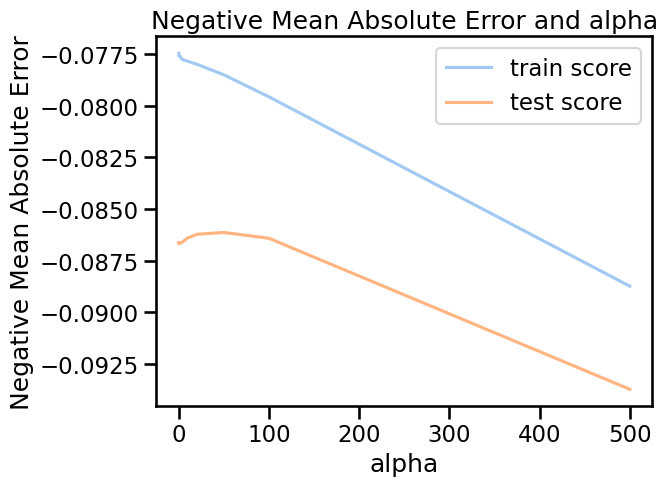

In [73]:
# plotting mean test and train scoes with alpha

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [74]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0      MSSubClass      -0.0216
1        MSZoning       0.0422
2         LotArea       0.0228
3          Street      -0.0134
4           Alley       0.0063
..            ...          ...
71        MiscVal      -0.0000
72         MoSold      -0.0003
73         YrSold      -0.0044
74       SaleType       0.0135
75  SaleCondition      -0.0085

[76 rows x 2 columns]

In [75]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0     MSSubClass  13.555995
16   OverallCond   0.076113
45  BsmtFullBath   0.065881
17     YearBuilt   0.054842
43  LowQualFinSF   0.050725
2        LotArea   0.042188
59    GarageQual   0.030329
42      2ndFlrSF   0.029544
28      BsmtQual   0.023942
3         Street   0.022813

#LASSO REGRESSION

In [76]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9171088213666733
0.9069814706770291


In [77]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [79]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [80]:
lasso.coef_

array([-2.05419632e-02,  4.68846554e-02,  2.29366119e-02, -0.00000000e+00,
        2.66182826e-03, -4.99476178e-03,  1.94144522e-02,  0.00000000e+00,
        0.00000000e+00, -8.94574040e-03, -2.41412442e-05, -3.56894397e-03,
        1.75757984e-03,  9.09059543e-03,  7.19986039e-03,  8.32212810e-02,
        5.73375614e-02,  2.47610283e-03,  8.49792182e-04,  1.14676357e-04,
        0.00000000e+00,  1.16037843e-03,  0.00000000e+00,  1.26641819e-03,
        9.12640942e-06,  0.00000000e+00,  5.82177884e-03,  2.30933033e-02,
       -3.68616548e-03,  1.02004544e-02,  1.85298940e-03,  1.92151959e-03,
        2.59025109e-04,  9.16232782e-04,  2.12129314e-04,  1.66038218e-04,
        0.00000000e+00,  2.53023244e-02,  4.61205802e-03,  2.25732097e-02,
       -0.00000000e+00,  0.00000000e+00,  1.56379688e-02, -7.28042648e-05,
        1.20616752e-01,  9.67323089e-03, -0.00000000e+00,  7.12993802e-03,
        2.42812384e-03, -6.21055500e-03, -3.31846399e-02, -1.08885074e-02,
       -1.06232885e-02,  

In [81]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9171088213666733
r2_test:
0.9069814706770291
RSS_train:
11.851655824512195
RSS_test:
5.779569855245543
MSE_train:
0.012230810964408869
MSE_test:
0.013893196767417171


In [82]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.164220      0.039837         0.019075        0.005259       0.0001   
1       0.081514      0.014216         0.015509        0.004074       0.0010   
2       0.054679      0.010150         0.017193        0.004074       0.0100   
3       0.025887      0.007414         0.008160        0.002432       0.1000   
4       0.016007      0.003869         0.006110        0.001670       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.084862          -0.081177          -0.088977   
1   {'alpha': 0.001}          -0.083525          -0.081154          -0.090056   
2    {'alpha': 0.01}          -0.089777          -0.080443          -0.088016   
3     {'alpha': 0.1}          -0.162477          -0.146057          -0.156602   
4     {'alpha': 0.2}          -0.195417          -0.183427          -0.185633   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.096000  ...        -0.086659        0.005387                1   
1          -0.095744  ...        -0.086697        0.005432                2   
2          -0.092655  ...        -0.087473        0.004071                3   
3          -0.146827  ...        -0.149219        0.009732                4   
4          -0.178332  ...        -0.182427        0.008584                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.078106           -0.079413           -0.076728   
1           -0.079698           -0.079957           -0.077639   
2           -0.084433           -0.086088           -0.083213   
3           -0.143268           -0.146042           -0.147024   
4           -0.175880           -0.178501           -0.178639   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.074928           -0.078459         -0.077527         0.001559  
1           -0.075936           -0.079694         -0.078585         0.001566  
2           -0.083193           -0.084967         -0.084379         0.001099  
3           -0.145940           -0.149899         -0.146435         0.002134  
4           -0.181109           -0.183077         -0.179441         0.002458  

[5 rows x 21 columns]

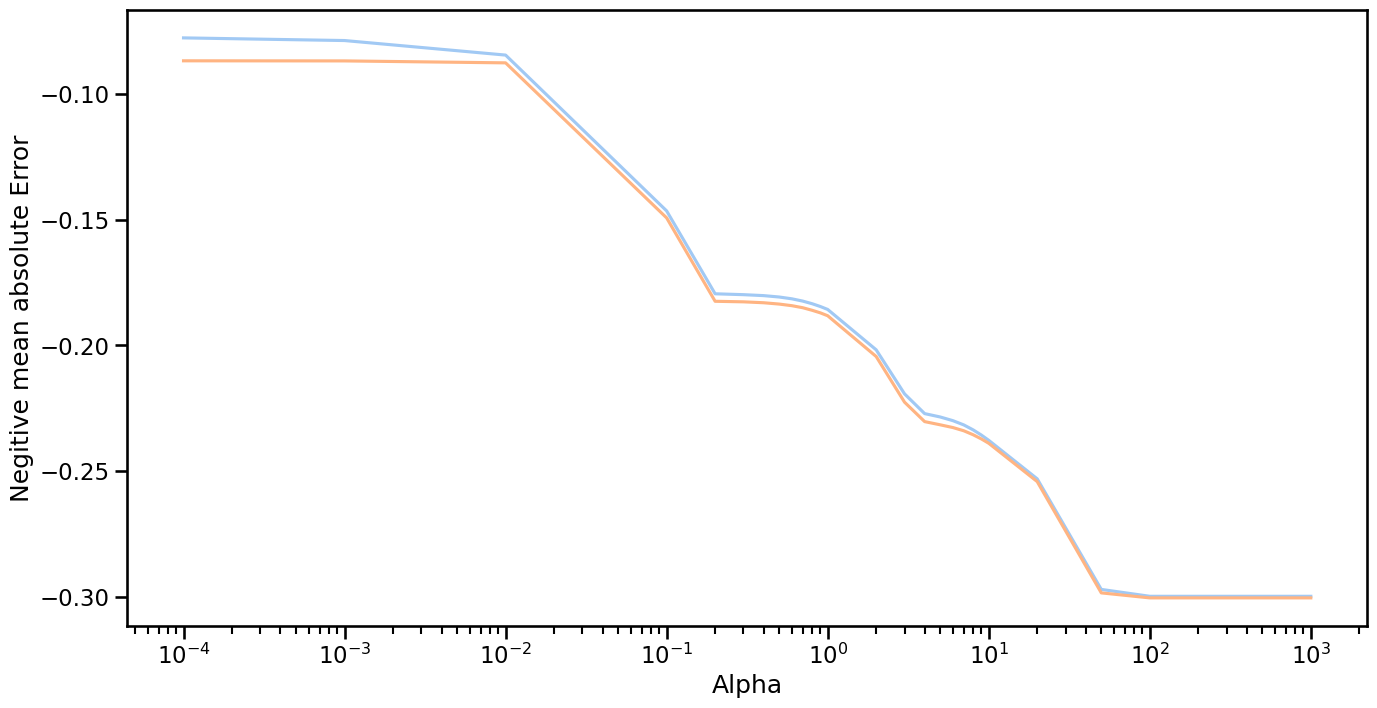

In [83]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [84]:
#checking for the alpha 0.001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9171088213666733
0.9069814706770291


In [85]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0     MSSubClass  12.053850
45  BsmtFullBath   0.120617
16   OverallCond   0.083221
17     YearBuilt   0.057338
2        LotArea   0.046885
59    GarageQual   0.029407
38     HeatingQC   0.025302
28      BsmtQual   0.023093
3         Street   0.022937
40    Electrical   0.022573

In [86]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0      MSSubClass      -0.0205
1        MSZoning       0.0469
2         LotArea       0.0229
3           Alley       0.0027
4        LotShape      -0.0050
5     LandContour       0.0194
6       LandSlope      -0.0089
7      Condition1      -0.0036
8      Condition2       0.0018
9        BldgType       0.0091
10     HouseStyle       0.0072
11    OverallQual       0.0832
12    OverallCond       0.0573
13      YearBuilt       0.0025
14   YearRemodAdd       0.0008
15      RoofStyle       0.0001
16    Exterior1st       0.0012
17     MasVnrType       0.0013
18      ExterCond       0.0058
19     Foundation       0.0231
20       BsmtQual      -0.0037
21       BsmtCond       0.0102
22   BsmtExposure       0.0019
23   BsmtFinType1       0.0019
24     BsmtFinSF1       0.0003
25   BsmtFinType2       0.0009
26     BsmtFinSF2       0.0002
27      BsmtUnfSF       0.0002
28        Heating       0.0253
29      HeatingQC       0.0046
30     CentralAir       0.0226
31       2ndFlrSF       0.0156
32   LowQualFinSF      -0.0001
33      GrLivArea       0.1206
34   BsmtFullBath       0.0097
35       FullBath       0.0071
36       HalfBath       0.0024
37   BedroomAbvGr      -0.0062
38   KitchenAbvGr      -0.0332
39    KitchenQual      -0.0109
40     Functional      -0.0106
41     Fireplaces       0.0040
42    FireplaceQu       0.0141
43     GarageType      -0.0004
44    GarageYrBlt       0.0001
45   GarageFinish       0.0007
46     GarageCars       0.0294
47     GarageQual       0.0104
48     PavedDrive       0.0103
49     WoodDeckSF       0.0128
50    OpenPorchSF       0.0041
51  EnclosedPorch       0.0058
52      3SsnPorch       0.0001
53    ScreenPorch       0.0003
54       PoolArea       0.0001
55         YrSold      -0.0037
56       SaleType       0.0129
57  SaleCondition      -0.0068

In [87]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train_lasso, y_train)

In [88]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df


Features  rfe_support  rfe_ranking  Coefficient
9     GrLivArea         True            1     0.120617
3   OverallQual         True            1     0.083221
4   OverallCond         True            1     0.057338
0      MSZoning         True            1     0.046885
13   GarageCars         True            1     0.029407
6       Heating         True            1     0.025302
7    CentralAir         True            1     0.022573
2   LandContour         True            1     0.019414
8      2ndFlrSF         True            1     0.015638
14   PavedDrive         True            1     0.010323

In [89]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.917140          0.917109
1    R2Score Test          0.906068          0.906981
2       RSS Train         11.847226         11.851656
3        RSS Test          5.836310          5.779570
4       MSE Train          0.012226          0.012231
5        MSE Test          0.014030          0.013893

PART 2 - Subjective Questions
Question 1
1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


Optimal Value of alpha for Ridge
Ridge - 50
Lasso - 0.001
Double the values of alpha
Ridge - 100
Lasso - 0.002
Lets analyze the model with these alpha values

In [90]:
# Ridge regression
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.96797055e-02  3.57007149e-02  2.27535936e-02 -7.11850100e-03
  3.48779487e-03 -6.94253201e-03  1.57763485e-02  1.66770379e-03
  1.70353234e-03 -9.32907542e-03  1.46556300e-04 -4.72053697e-03
  6.23596622e-03  7.34288912e-03  9.40987263e-03  7.10628768e-02
  5.18083604e-02  2.26811913e-03  1.25463103e-03  2.09143973e-03
  2.73269005e-03  1.59896151e-03 -3.21092469e-04  3.36268326e-03
  2.96289751e-05  5.08148409e-03  6.41871984e-03  2.22110280e-02
 -4.14099879e-03  1.14676779e-02  2.61254685e-03  3.60080912e-03
  2.79536056e-04  2.65872067e-03  2.29857539e-04  1.86116465e-04
  1.79195282e-06  1.58347701e-02  8.38940805e-03  1.66952429e-02
 -7.04943165e-04  2.69017007e-02  4.69305933e-02  3.98189060e-05
  6.06358917e-02  8.22476560e-03 -4.07131870e-03  1.60367956e-02
  1.01412151e-02 -1.55671904e-03 -1.61666621e-02 -1.10407109e-02
 -1.05566378e-02  9.36410472e-03  1.47490555e-02 -3.03160051e-03
  5.00250792e-05  5.84939665e-04  3.06167265e-02  1.24285188e-02
  5.38786657e-04  1.36890

In [91]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.9149384183348298
r2_test:
0.9039957080087232
RSS_train:
12.161976779745233
RSS_test:
5.965085838332543
MSE_train:
0.012551059628220054
MSE_test:
0.014339148649837844


In [92]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0      MSSubClass      -0.0197
1        MSZoning       0.0357
2         LotArea       0.0228
3          Street      -0.0071
4           Alley       0.0035
..            ...          ...
71        MiscVal      -0.0000
72         MoSold      -0.0003
73         YrSold      -0.0045
74       SaleType       0.0135
75  SaleCondition      -0.0074

[76 rows x 2 columns]

In [93]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0     MSSubClass  13.342578
16   OverallCond   0.071063
45  BsmtFullBath   0.060636
17     YearBuilt   0.051808
43  LowQualFinSF   0.046931
2        LotArea   0.035701
59    GarageQual   0.030617
42      2ndFlrSF   0.026902
3         Street   0.022754
28      BsmtQual   0.022211

Here we have got MSSubclass, OverallCond, BSMTFullBath, YearBuilt, LowQualFinSF.

In [94]:
# Lasso Regression:

lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9144247071516226
0.9044565785805525


In [95]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.9144247071516226
r2_test:
0.9044565785805525
RSS_train:
12.23542643068464
RSS_test:
5.936450321479056
MSE_train:
0.012626859061594055
MSE_test:
0.014270313272786191


In [96]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0      MSSubClass      -0.0189
1        MSZoning       0.0429
2         LotArea       0.0227
3        LotShape      -0.0025
4     LandContour       0.0125
5      Condition1      -0.0032
6        BldgType       0.0041
7      HouseStyle       0.0067
8     OverallQual       0.0859
9     OverallCond       0.0578
10      YearBuilt       0.0026
11   YearRemodAdd       0.0009
12    Exterior1st       0.0013
13      ExterCond       0.0039
14     Foundation       0.0198
15       BsmtQual      -0.0006
16       BsmtCond       0.0068
17   BsmtExposure       0.0013
18   BsmtFinType1       0.0016
19     BsmtFinSF1       0.0003
20     BsmtFinSF2       0.0002
21      BsmtUnfSF       0.0002
22        Heating       0.0160
23      HeatingQC       0.0043
24     CentralAir       0.0056
25       2ndFlrSF       0.0156
26   LowQualFinSF      -0.0001
27      GrLivArea       0.1185
28   BsmtFullBath       0.0064
29       FullBath       0.0026
30       HalfBath       0.0012
31   BedroomAbvGr      -0.0037
32   KitchenAbvGr      -0.0060
33    KitchenQual      -0.0079
34     Functional      -0.0069
35     Fireplaces       0.0053
36    FireplaceQu       0.0148
37    GarageYrBlt       0.0001
38   GarageFinish       0.0003
39     GarageCars       0.0303
40     GarageQual       0.0096
41     WoodDeckSF       0.0119
42    OpenPorchSF       0.0038
43  EnclosedPorch       0.0047
44      3SsnPorch       0.0001
45    ScreenPorch       0.0003
46       PoolArea       0.0001
47         YrSold      -0.0034
48       SaleType       0.0121
49  SaleCondition      -0.0031

In [97]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train_lasso, y_train)

In [98]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

Features  rfe_support  rfe_ranking  Coefficient
10    GrLivArea         True            1     0.125134
3   OverallQual         True            1     0.080225
4   OverallCond         True            1     0.057157
0      MSZoning         True            1     0.049396
8    CentralAir         True            1     0.041041
7       Heating         True            1     0.033909
14   GarageCars         True            1     0.028924
2   LandContour         True            1     0.025527
1       LotArea         True            1     0.023584
9      2ndFlrSF         True            1     0.014948

In [99]:
#Comparing results of Ridge and Lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.914938          0.914425
1    R2Score Test          0.903996          0.904457
2       RSS Train         12.161977         12.235426
3        RSS Test          5.965086          5.936450
4       MSE Train          0.012551          0.012627
5        MSE Test          0.014339          0.014270

The R2 score of Ridge regression is slightly  greater than that of Lasso regression for both train ans test sets.  The most important predictor variables for lasso regression are :
GrLivArea
OverallQual
CentralAir
OverallCond
PavedDrive


In [100]:
df1.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60        2     8450      0     2        3           2         1   
1          20        2     9600      0     2        3           2         1   
2          60        2    11250      0     2        2           2         1   
4          60        2    14260      0     2        2           2         1   
5          50        2    14115      0     2        2           2         1   

  LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
0         3         1  ...        0      1     3           3       0       2   
1         0         1  ...        0      1     3           3       0       5   
2         3         1  ...        0      1     3           3       0       9   
4         0         1  ...        0      1     3           3       0      12   
5         3         1  ...        0      1     1           0     700      10   

   YrSold  SaleType  SaleCondition   NewPrice  
0    2008         2              3  12.247694  
1    2007         2              3  12.109011  
2    2008         2              3  12.317167  
4    2008         2              3  12.429216  
5    2009         2              3  11.870600  

[5 rows x 77 columns]

In [101]:
houseLasso = df1
houseLasso.columns
houseLasso = houseLasso.drop(["GrLivArea", "CentralAir", "OverallQual", "OverallCond", "PavedDrive"], axis=1)

In [109]:
df_train, df_test = train_test_split(houseLasso, train_size=0.7,test_size = 0.3, random_state=100)
df_train.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
563           50        2    21780      0     2        3           2   
1036          20        2    12898      0     2        2           3   
513           20        2     9187      0     2        3           1   
527           60        2    14948      0     2        2           2   
1074          20        2     8556      0     2        3           2   

     Utilities LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature  \
563          1         3         1  ...        0      1     3           3   
1036         1         3         1  ...        0      1     3           3   
513          1         2         1  ...        0      1     3           3   
527          1         3         1  ...        0      1     3           3   
1074         1         3         1  ...        0      1     3           3   

     MiscVal  MoSold  YrSold SaleType SaleCondition   NewPrice  
563        0       7    2008        2             3  12.128111  
1036       0       9    2009        2             3  12.661914  
513        0       6    2007        2             3  11.805595  
527        0      11    2008        8             4  13.008659  
1074       0       5    2007        2             3  12.175613  

[5 rows x 72 columns]

In [110]:
num_col =['MSSubClass','LotArea',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [111]:
X_trainLS = df_train
y_trainLS = df_train.pop('NewPrice')

X_testLS = df_test
y_testLS = df_test.pop('NewPrice')

In [112]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)

rfe = rfe.fit(X_trainLS, y_trainLS)

In [113]:
# Assign the columns selected by RFE to cols

col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

Variable  rfe_support  rfe_ranking
0       MSZoning         True            1
1         Street         True            1
2    LandContour         True            1
3      Utilities         True            1
4      LandSlope         True            1
5       BsmtQual         True            1
6       BsmtCond         True            1
7        Heating         True            1
8      HeatingQC         True            1
9       1stFlrSF         True            1
10      2ndFlrSF         True            1
11  BsmtFullBath         True            1
12  KitchenAbvGr         True            1
13    Functional         True            1
14    GarageCars         True            1

In [114]:
# Assign the 50 columns to X_train_rfe

X_trainLS_rfe = X_trainLS[col]
# Associate the new 50 columns to X_train and X_test for further analysis

X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

perform LAsso to new model after dropping the five imp features

In [115]:
# Lasso Regression:

lm = Lasso(alpha=0.001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))

0.8177093766864395
0.8209794436961928


In [116]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)


r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)

0.8177093766864395
0.8209794436961928
26.063638654541958
11.123179631128195
0.026897459911808006


In [117]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


Featuere       Coef
0     MSSubClass  11.575653
10  Neighborhood   0.205033
11    Condition1   0.158588
15     YearBuilt   0.080554
1       MSZoning   0.078558
7      Utilities   0.059213
3         Street   0.052468
8      LotConfig   0.051453
6    LandContour   0.043272
12    Condition2   0.038647